In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis

%matplotlib inline

In [2]:
df_raw = pd.read_csv('data\car_prices.csv', error_bad_lines=False)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

In [3]:
print(df_raw.shape)
df_raw.head(5)

(558811, 16)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df_raw[df_raw['sellingprice']<=100000].describe()

,year,condition,odometer,mmr,sellingprice
count,558645.000000,546852.000000,558551.000000,558645.000000,558645.000000
mean,2010.037929,3.424213,68340.105278,13736.664653,13578.135018
std,3.967028,0.949378,53396.381469,9484.114783,9552.386831
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28389.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52277.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99126.500000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,116000.000000,100000.000000


In [5]:
freqs,bins=np.histogram(df_raw[df_raw['sellingprice']<=100000]['sellingprice'],20)

<AxesSubplot:ylabel='Frequency'>

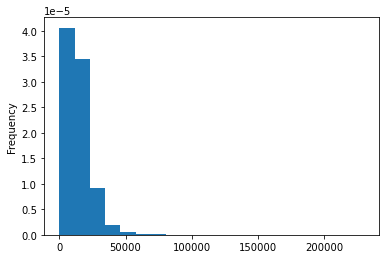

In [6]:
df_raw['sellingprice'].plot.hist(bins=20,density=True)

## Remove outliers

In [7]:
df_filt = df_raw[df_raw['sellingprice']<=100000]

<AxesSubplot:ylabel='Frequency'>

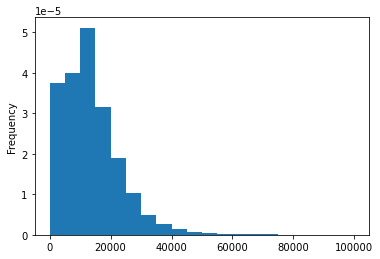

In [8]:
df_filt['sellingprice'].plot.hist(bins=20,density=True)

In [9]:
df_filt.groupby('body').count()

,year,make,model,trim,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
body,,,,,,,,,,,,,,,
Access Cab,232,232,232,232,214,232,232,227,232,231,231,232,232,232,232
Beetle Convertible,52,52,52,52,47,52,52,52,52,51,51,52,52,52,52
CTS Coupe,129,129,129,129,102,129,129,129,129,129,129,129,129,129,129
CTS Wagon,13,13,13,13,11,13,13,12,13,13,13,13,13,13,13
CTS-V Coupe,28,28,28,28,21,28,28,27,28,28,28,28,28,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transit van,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
tsx sport wagon,8,8,8,8,6,8,8,8,8,8,8,8,8,8,8
van,570,570,570,570,444,570,570,570,570,570,570,570,570,570,570


In [10]:
df_grp_body=df_filt.groupby('body').count().reset_index()[['body','model']].sort_values('model',ascending=False)
df_grp_body['body_count']=df_grp_body['model'].cumsum()
df_grp_body['pcg_csum']=df_grp_body['body_count']/df_grp_body['body_count'].max()
df_grp_body = df_grp_body[df_grp_body['pcg_csum']<=0.95]
print(df_grp_body.shape)
df_grp_body.head(5)

(18, 4)


,body,model,body_count,pcg_csum
36,Sedan,199338,199338,0.365522
35,SUV,119256,318594,0.584199
77,sedan,41864,360458,0.660964
80,suv,24542,385000,0.705966
24,Hatchback,21380,406380,0.745170


In [11]:
df_filt = df_filt[df_filt['body'].isin(df_grp_body['body'])]

In [12]:
df_filt

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


### Measure of Central Tendency and Variance

In [13]:
print(df_filt['sellingprice'].describe())
df_filt['sellingprice'].describe()['mean']

count    516695.000000
mean      13455.890191
std        9398.284146
min           1.000000
25%        7000.000000
50%       12000.000000
75%       17800.000000
max      100000.000000
Name: sellingprice, dtype: float64


13455.890190537939

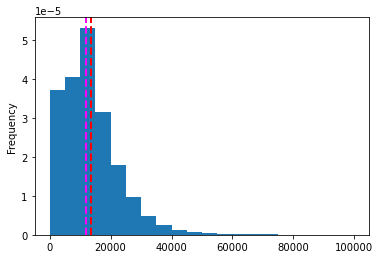

In [14]:
df_filt['sellingprice'].plot.hist(bins=20,density=True)
plt.axvline(df_filt['sellingprice'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['sellingprice'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)

### Distribution Fit

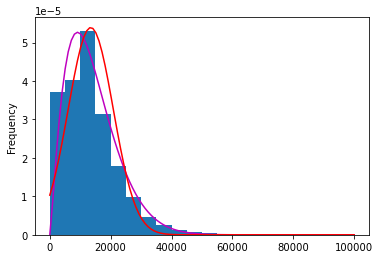

In [15]:
from scipy.stats import beta as beta_fun
fig, ax = plt.subplots(1, 1)
df_filt['sellingprice'].plot.hist(bins=20,density=True)

alpha = 2.3
beta = 14
x = np.linspace(0,1, 100)
plt.plot(100000*x, beta_fun.pdf(x,alpha,beta)/100000,'m-', lw=1.5, alpha=1, label='norm pdf')



x = np.linspace(0,100000, 100)
plt.plot(x, norm.pdf(x,df_filt['sellingprice'].describe()['mean'],df_filt['sellingprice'].describe()['std']-2000)
         ,'r-', lw=1.5, alpha=1, label='expon pdf')

$$ E[X] = \frac{\alpha}{\alpha + \beta} $$

In [16]:
Exp_value = alpha/(alpha+beta)*100000
print(Exp_value)

14110.429447852759


### Chi Square Test

In [17]:
df_pivot=df_filt.groupby(['make','body']).count()[['model','sellingprice']].reset_index()\
.pivot(index='make', columns='body', values='model').fillna(0)

In [18]:
df_pivot

body,Convertible,Coupe,Crew Cab,Extended Cab,G Sedan,Hatchback,Minivan,Regular Cab,SUV,Sedan,SuperCab,SuperCrew,Van,Wagon,hatchback,minivan,sedan,suv
make,,,,,,,,,,,,,,,,,,
Acura,0.0,78.0,0.0,0.0,0.0,191.0,0.0,0.0,1621.0,2981.0,0.0,0.0,0.0,0.0,27.0,0.0,564.0,384.0
Aston Martin,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Audi,335.0,361.0,0.0,0.0,0.0,16.0,0.0,0.0,751.0,2764.0,0.0,0.0,0.0,336.0,6.0,0.0,729.0,279.0
BMW,1763.0,1576.0,0.0,0.0,0.0,212.0,0.0,0.0,3494.0,9423.0,0.0,0.0,0.0,145.0,71.0,0.0,2190.0,885.0
Bentley,16.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
Buick,0.0,4.0,0.0,0.0,0.0,0.0,49.0,0.0,1294.0,2890.0,0.0,0.0,0.0,0.0,0.0,6.0,618.0,246.0
Cadillac,22.0,53.0,129.0,0.0,0.0,0.0,0.0,0.0,2574.0,3411.0,0.0,0.0,0.0,0.0,0.0,0.0,560.0,526.0
Chevrolet,611.0,2436.0,5065.0,2750.0,0.0,1657.0,535.0,964.0,12810.0,21616.0,0.0,0.0,1199.0,938.0,356.0,74.0,4012.0,2397.0
Chrysler,621.0,54.0,0.0,0.0,0.0,20.0,5025.0,0.0,197.0,7391.0,0.0,0.0,0.0,1164.0,6.0,988.0,1500.0,31.0


In [19]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 761539.7429
p-value: 0.0000


## Two Sample Test

In [50]:
df_make_smy=df_filt.groupby('make').agg({'sellingprice':['count','mean']}).reset_index()
df_make_smy.columns = df_make_smy.columns.droplevel()

In [52]:
df_make_smy.sort_values('count')

,,count,mean
28,Lotus,1,40800.000000
12,Ferrari,1,81000.000000
9,Daewoo,3,400.000000
13,Fisker,9,46461.111111
37,Plymouth,16,6850.000000
1,Aston Martin,18,52044.444444
16,Geo,19,528.947368
46,Tesla,23,67054.347826
4,Bentley,70,59043.571429
30,Maserati,109,39355.504587


In [53]:
df_merc = df_filt[df_filt['make']=='Chevrolet']
df_non_merc = df_filt[df_filt['make']=='Nissan']

In [54]:
df_merc.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300,17500,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)
14,2014,Chevrolet,Cruze,2LT,Sedan,automatic,1g1pe5sbxe7120097,ca,NaN,15686.0,blue,black,avis rac/san leandro,13900,10600,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
18,2014,Chevrolet,Camaro,LS,Coupe,automatic,2g1fa1e39e9134494,ca,1.7,13441.0,black,black,wells fargo dealer services,17750,17000,Tue Dec 30 2014 15:00:00 GMT-0800 (PST)
20,2015,Chevrolet,Impala,LTZ,Sedan,automatic,2g1165s30f9103921,ca,1.9,14538.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24300,7200,Tue Jul 07 2015 09:30:00 GMT-0700 (PDT)


In [55]:
np.random.seed(123)
nonMath = df_non_merc['sellingprice']
math = df_merc['sellingprice']

C:\Users\madin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sellingprice', ylabel='Density'>

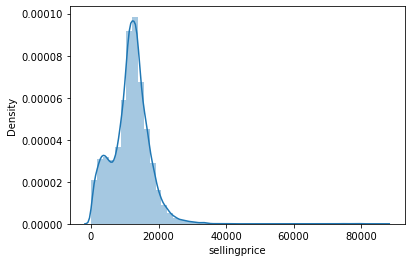

In [56]:
sns.distplot(nonMath)

C:\Users\madin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sellingprice', ylabel='Density'>

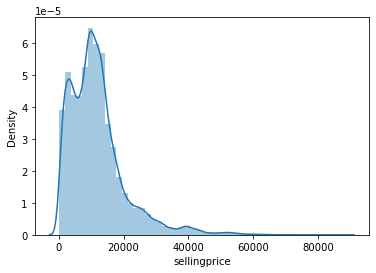

In [57]:
sns.distplot(math)

non-Mercedes sample mean:11646.99857595838
non-Mercedes sample std:5303.821554509706
non-Mercedes Kurtosis:0.7059377105353328
Mercedes sample mean:11504.638977859455
t-statistic:-3.4498568759401143
p-value:0.000281


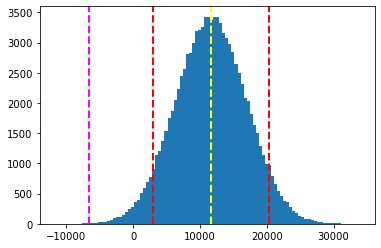

In [58]:
np.random.seed(123)
nonMath =df_non_merc[df_non_merc['sellingprice']<=50000]['sellingprice']
math = df_merc[df_merc['sellingprice']<=50000]['sellingprice']
print("non-Mercedes sample mean:" + str(nonMath.mean()))
print("non-Mercedes sample std:" + str(nonMath.std()))
print("non-Mercedes Kurtosis:" + str(nonMath.kurtosis()))
print("Mercedes sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()